In [1]:
import sys

import pandas as pd
import numpy as np


In [2]:
# Set the maximum width of the display
pd.set_option('display.width', 1000)

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 30)

pd.set_option('display.precision', 2)

In [3]:
date = pd.date_range(start='01/01/2021 00:00:00', end='31/12/2023 23:59:00', freq='1h')
date.shape

(26280,)

In [4]:
# 24h * 365days = 8760
# 8760 * 3 years = 26280

In [5]:
fs = pd.Timedelta("1095D") / pd.Timedelta("1h") # 1095 days / 365 days = 3 years 
fs

26280.0

In [6]:
t = np.arange(1, fs + 1, 1)
t

array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 2.6278e+04, 2.6279e+04,
       2.6280e+04])

In [7]:
np.random.seed(123)

X_t1 =  5 * np.cos(2 * np.pi * t * (1/24)) + 5 * np.sin(2 * np.pi * t * (1/24)) # daily
X_t2 = - 20 * np.cos(2 * np.pi * t * (1/168)) - 20 * np.sin(2 * np.pi * t * (1/168)) # weekly
X_t3 =  - 10 * np.cos(2 * np.pi * t * (1/2190)) - 10 * np.sin(2 * np.pi * t * (1/2190)) # quarterly
X_t4 =  20 * np.cos(2 * np.pi * t * (1/8760)) + 20 * np.sin(2 * np.pi * t * (1/8760)) # annually

X_time = X_t1 + X_t2 + X_t3 + X_t4 

In [8]:
df = pd.DataFrame({'target': X_time}, index=date)
df.index = df.index.to_period('1h')
df.index = df.index.to_timestamp()

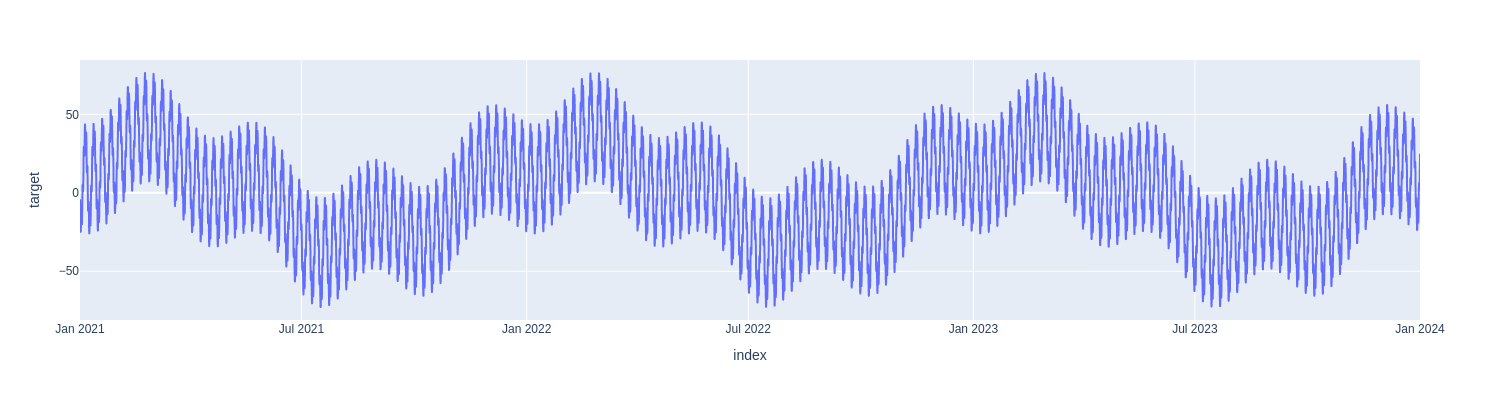

In [30]:
# Using plotly.express
import plotly.express as px

fig = px.line(df, x=df.index, y='target')
fig.update_layout(width=1500, height=400)
fig.show("png")

In [10]:
X = df.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.isocalendar().week   # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
X["hour"] = X.index.hour
X["quarter"] = X.index.quarter
X["month"] = X.index.month

In [11]:
X

,target,day,week,dayofyear,year,hour,quarter,month
2021-01-01 00:00:00,-4.62,4,53,1,2021,0,1,1
2021-01-01 01:00:00,-4.64,4,53,1,2021,1,1,1
2021-01-01 02:00:00,-5.09,4,53,1,2021,2,1,1
2021-01-01 03:00:00,-5.98,4,53,1,2021,3,1,1
2021-01-01 04:00:00,-7.32,4,53,1,2021,4,1,1
2021-01-01 05:00:00,-9.03,4,53,1,2021,5,1,1
2021-01-01 06:00:00,-11.06,4,53,1,2021,6,1,1
2021-01-01 07:00:00,-13.29,4,53,1,2021,7,1,1
2021-01-01 08:00:00,-15.61,4,53,1,2021,8,1,1
2021-01-01 09:00:00,-17.89,4,53,1,2021,9,1,1


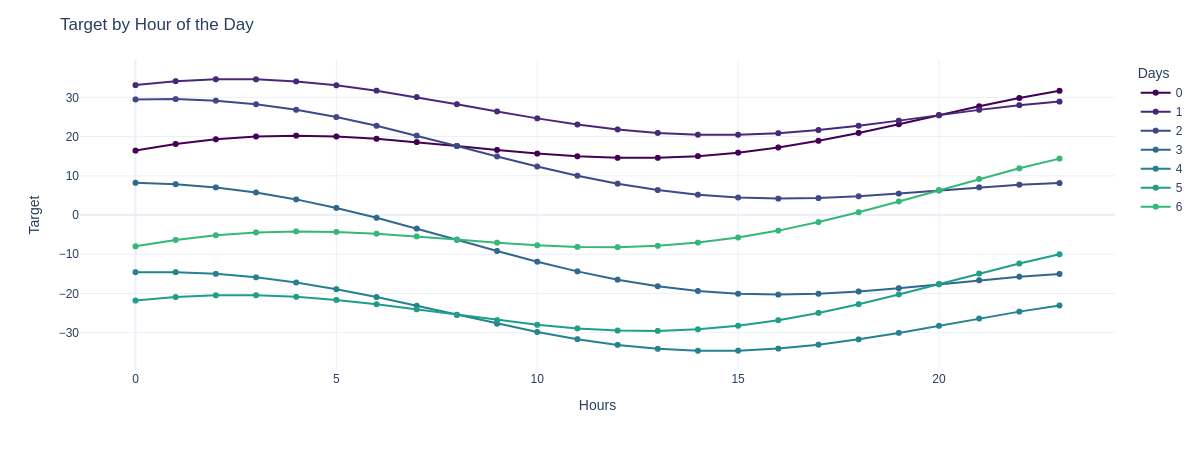

In [12]:
import plotly.express as px

# 0 represents Monday
# 1 represents Tuesday
# 2 represents Wednesday
# 3 represents Thursday
# 4 represents Friday
# 5 represents Saturday
# 6 represents Sunday

# Create the line plot using Plotly
fig = px.line(
    X.groupby(['day', 'hour']).agg({'target': 'mean'}).reset_index(), 
    x='hour', 
    y='target', 
    color='day', 
    markers=True,
    color_discrete_sequence=px.colors.sequential.Viridis,  # Using a color palette similar to sns.color_palette("husl")
)

# Customize the layout
fig.update_layout(
    title="Target by Hour of the Day",
    xaxis_title="Hours",
    yaxis_title="Target",
    legend_title="Days",
    template="plotly_white",  # Set a clean white theme
    width=1200,  # Set the width of the plot
    height=450  # Set the height of the plot
)

# Show the plot
# fig.show()
fig.show("png")

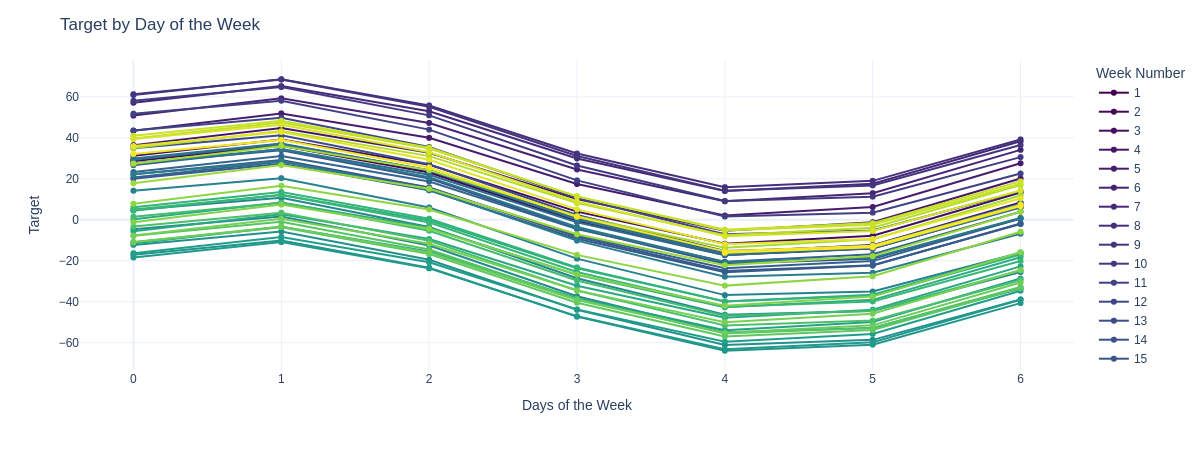

In [13]:
# Create the line plot using Plotly

colors = px.colors.sample_colorscale(px.colors.sequential.Viridis, np.linspace(0, 1, 53))

fig = px.line(
    X.groupby(['week', 'day']).agg({'target': 'mean'}).reset_index(),
    x='day',
    y='target',
    color='week',
    markers=True,
    color_discrete_sequence=colors,  # Using a color palette similar to sns.color_palette("husl")
)

# Customize the layout
fig.update_layout(
    title="Target by Day of the Week",
    xaxis_title="Days of the Week",
    yaxis_title="Target",
    legend_title="Week Number",
    template="plotly_white",  # Set a clean white theme
    width=1200,  # Set the width of the plot
    height=450  # Set the height of the plot
)

# Show the plot
# fig.show()
fig.show("png")



In [14]:
X.groupby(['year','dayofyear', 'quarter']).agg({'target': 'mean'}).reset_index()

,year,dayofyear,quarter,target
0,2021,1,1,-16.15
1,2021,2,1,-13.35
2,2021,3,1,6.72
3,2021,4,1,28.76
4,2021,5,1,36.03
5,2021,6,1,22.93
6,2021,7,1,-0.75
7,2021,8,1,-17.20
8,2021,9,1,-14.03
9,2021,10,1,6.42


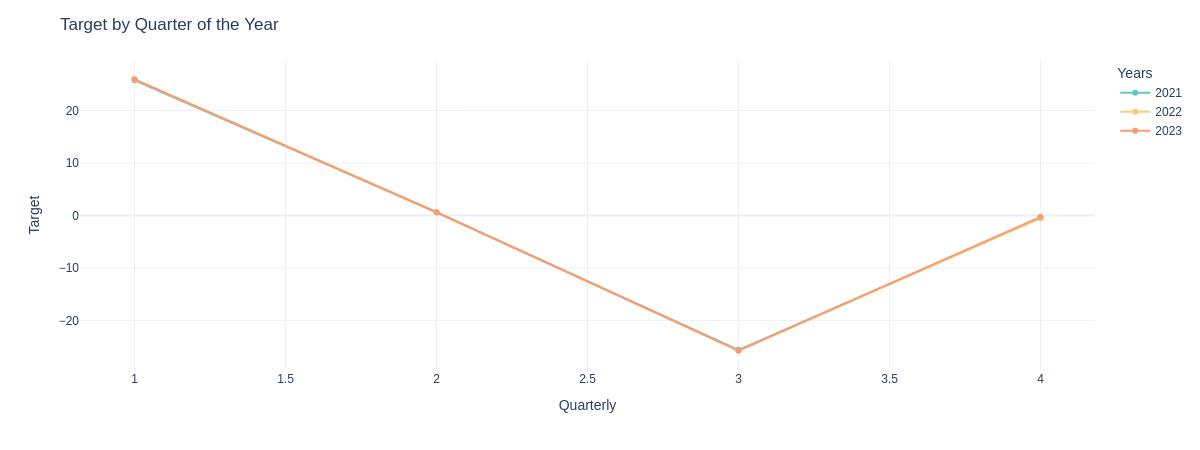

In [15]:
# Create the line plot using Plotly
fig = px.line(
    X.groupby(['year', 'quarter']).agg({'target': 'mean'}).reset_index(), 
    x='quarter', 
    y='target', 
    color='year', 
    markers=True,
    color_discrete_sequence=px.colors.qualitative.Pastel,  # Using a color palette similar to sns.color_palette("husl")
)

# Customize the layout
fig.update_layout(
    title="Target by Quarter of the Year",
    xaxis_title="Quarterly",
    yaxis_title="Target",
    legend_title="Years",
    template="plotly_white",  # Set a clean white theme
    width=1200,  # Set the width of the plot
    height=450  # Set the height of the plot
)

# Show the plot
# fig.show()
fig.show("png")


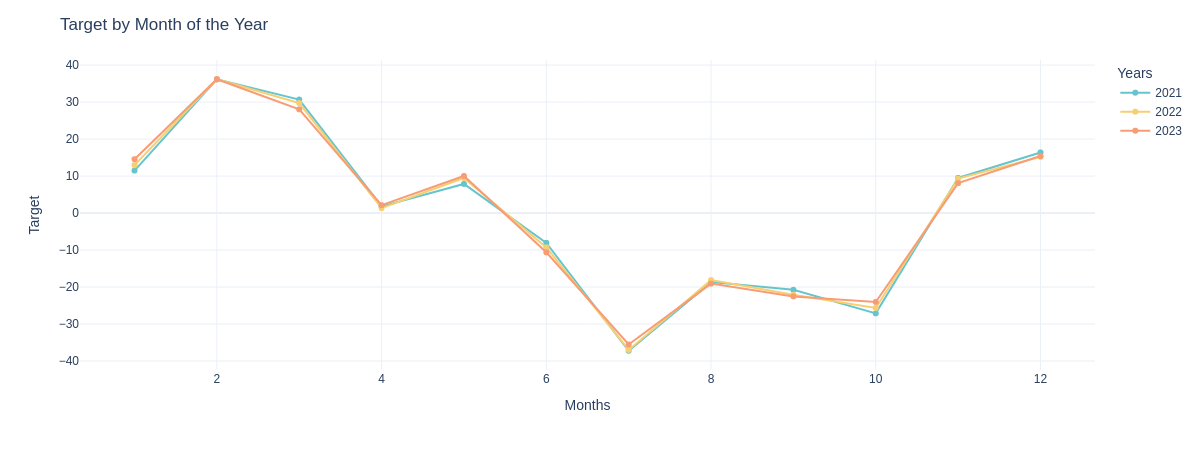

In [16]:
# Create the line plot using Plotly
fig = px.line(
    X.groupby(['year', 'month']).agg({'target': 'mean'}).reset_index(), 
    x='month', 
    y='target', 
    color='year', 
    markers=True,
    color_discrete_sequence=px.colors.qualitative.Pastel,  # Using a color palette similar to sns.color_palette("husl")
)

# Customize the layout
fig.update_layout(
    title="Target by Month of the Year",
    xaxis_title="Months",
    yaxis_title="Target",
    legend_title="Years",
    template="plotly_white",  # Set a clean white theme
    width=1200,  # Set the width of the plot
    height=450  # Set the height of the plot
)

# Show the plot
# fig.show()
fig.show("png")

In [17]:
from scipy.signal import find_peaks, periodogram
import matplotlib.pyplot as plt

In [18]:
frequencies, spectrum = periodogram(
    X.target,
    nfft=fs,
    detrend='linear',
    window="boxcar",
    scaling='density',
)

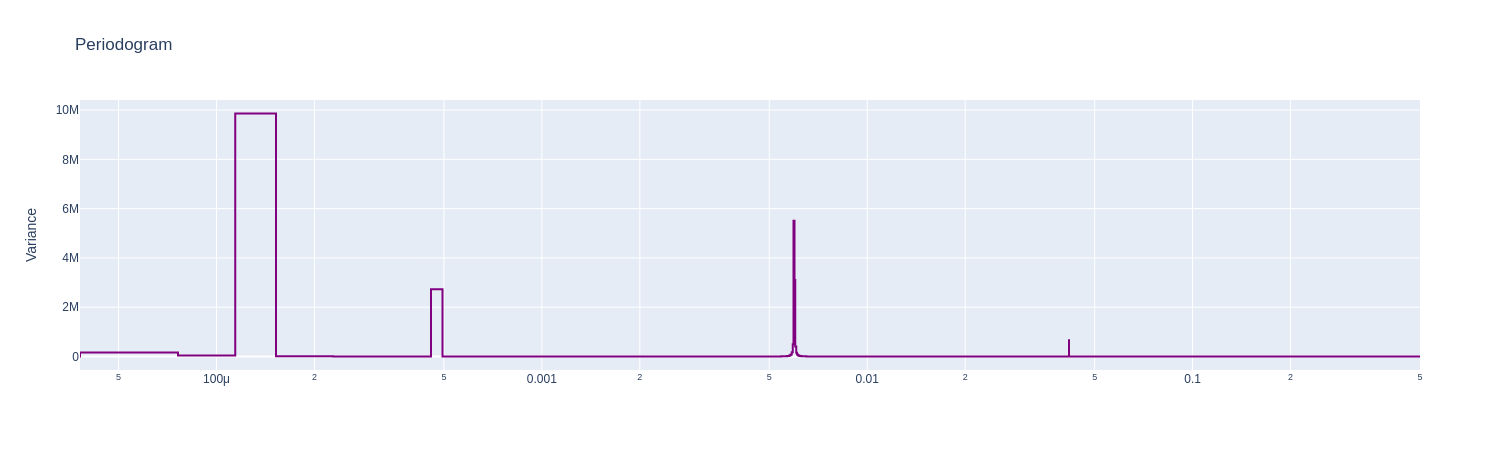

In [29]:
import plotly.graph_objects as go

# Assuming 'frequencies' and 'spectrum' are defined and populated with data

fig = go.Figure()

# Add step plot
fig.add_trace(go.Scatter(
    x=frequencies,
    y=spectrum,
    mode='lines',
    line=dict(shape='hv', color='purple')
))

# Set x-axis to logarithmic scale
fig.update_xaxes(type="log")

# Add labels and title
fig.update_layout(
    yaxis_title="Variance",
    title="Periodogram",
    width=1500,  # Set the width of the plot
    height=450  # Set the height of the plot
)

# Show plot
# fig.show()
fig.show("png")


In [20]:
# x = np.array([4, 3, 1, 2, 5])
# po = np.argsort(x) # po: [2 3 1 0 4]
# x[po] # array([1, 2, 3, 4, 5])

peaks_indices, _ = find_peaks(spectrum)
for i in range(1, 5):
    top_peaks_indices = np.argsort(spectrum[peaks_indices])[-i] # the last element
    top_frequencies = frequencies[peaks_indices][top_peaks_indices] 
    print(f'{i}º higher frequency: {1/top_frequencies}') 

1º higher frequency: 8760.0
2º higher frequency: 168.46153846153845
3º higher frequency: 2190.0
4º higher frequency: 23.999999999999996


In [21]:
peaks_indices, _ = find_peaks(spectrum)
for i in range(1, 6):
    top_peaks_indices = np.argsort(spectrum[peaks_indices])[-i] # the last element
    top_frequencies = frequencies[peaks_indices][top_peaks_indices]
    top_spectrum = spectrum[peaks_indices][top_peaks_indices]
    if i == 1: 
        top_spec = top_spectrum 
    print(f'{i}º higher frequency: {1/top_frequencies} - {top_spectrum / top_spec * 100}') 

1º higher frequency: 8760.0 - 100.0
2º higher frequency: 168.46153846153845 - 55.90335905122286
3º higher frequency: 2190.0 - 27.70026301672917
4º higher frequency: 23.999999999999996 - 6.653427941219553
5º higher frequency: 26279.999999999996 - 1.6912095161257685


In [22]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import MSTL

In [23]:
# 11m 19.2s

mstl = MSTL(X.target, periods=[24, 168, 2190, 8760])
res = mstl.fit()

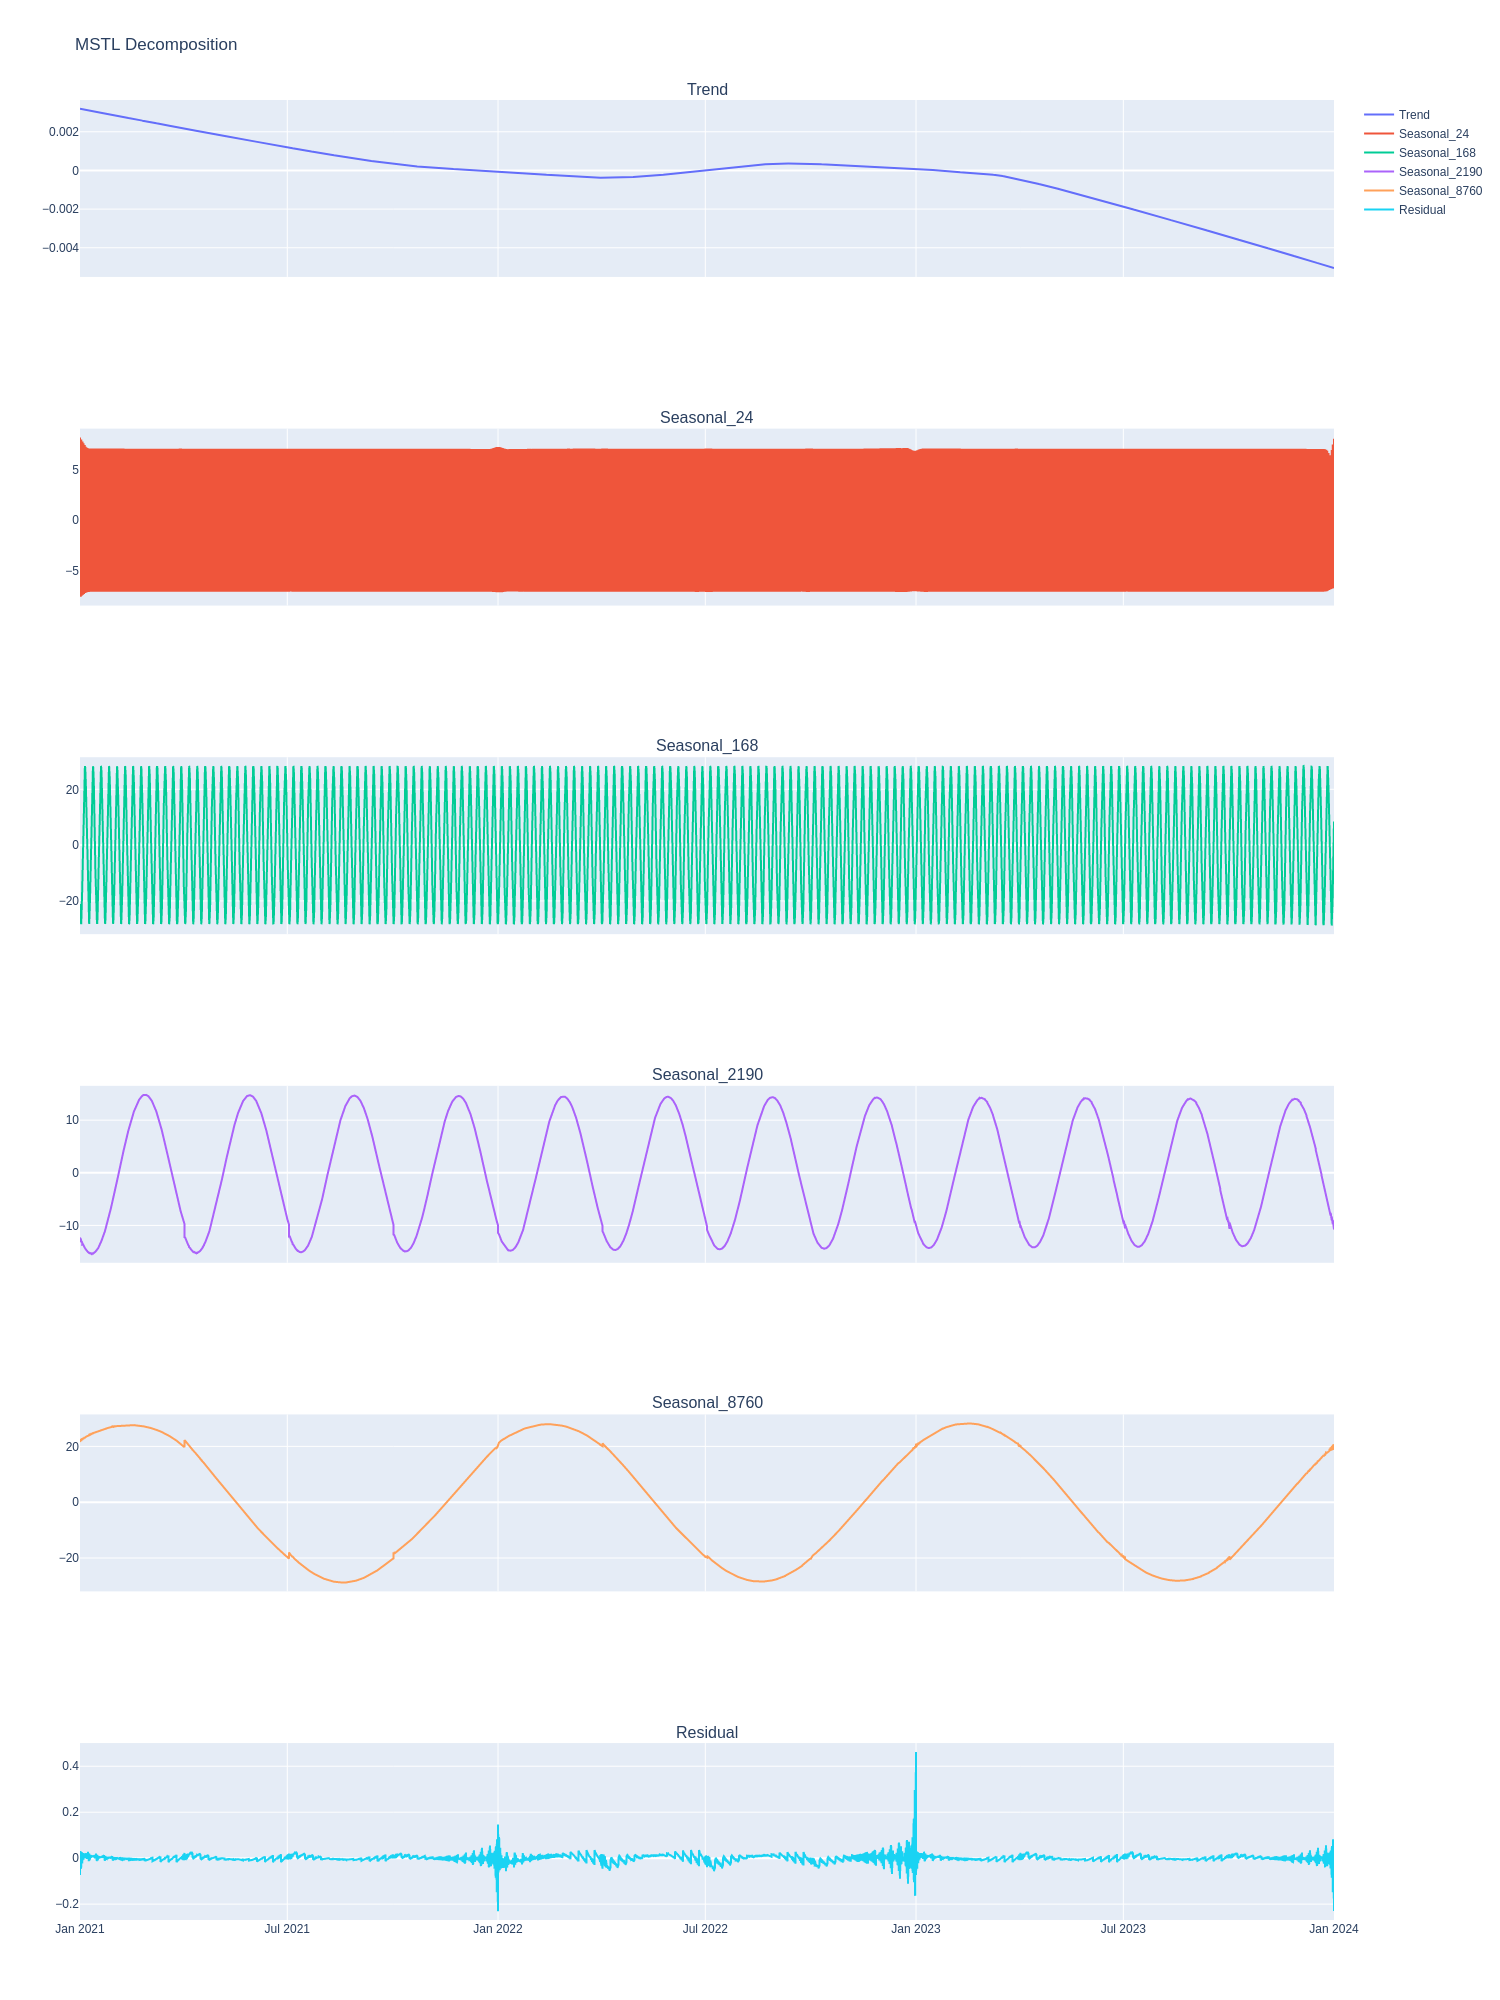

In [27]:
# Extract components
trend = res.trend
seasonal_24	= res.seasonal['seasonal_24']
seasonal_168 = res.seasonal['seasonal_168']
seasonal_2190 = res.seasonal['seasonal_2190']
seasonal_8760 = res.seasonal['seasonal_8760']
residual = res.resid

# Create a Plotly subplot figure
fig = make_subplots(rows=6, cols=1, shared_xaxes=True,
                    subplot_titles=("Trend", 'Seasonal_24', 'Seasonal_168', 'Seasonal_2190', 'Seasonal_8760', "Residual")
                    )

# Add traces for each component
fig.add_trace(go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend'), row=1, col=1)
fig.add_trace(go.Scatter(x=seasonal_24.index, y=seasonal_24, mode='lines', name='Seasonal_24'), row=2, col=1)
fig.add_trace(go.Scatter(x=seasonal_168.index, y=seasonal_168, mode='lines', name='Seasonal_168'), row=3, col=1)
fig.add_trace(go.Scatter(x=seasonal_2190.index, y=seasonal_2190, mode='lines', name='Seasonal_2190'), row=4, col=1)
fig.add_trace(go.Scatter(x=seasonal_8760.index, y=seasonal_8760, mode='lines', name='Seasonal_8760'), row=5, col=1)
fig.add_trace(go.Scatter(x=residual.index, y=residual, mode='lines', name='Residual'), row=6, col=1)

# Update layout
fig.update_layout(height=2000, width=1500, title_text="MSTL Decomposition")

# Show the figure
fig.show("png")
